# Arquitecturas individuales CNN



In [ ]:
# Cargar repositorio
!git clone https://github.com/Diego99021999/Proyecto_Deep_Learning_Diego_Lopez

Cloning into 'Proyecto_Deep_Learning_Diego_Lopez'...
remote: Enumerating objects: 466, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 466 (delta 4), reused 5 (delta 2), pack-reused 453
Receiving objects: 100% (466/466), 392.44 MiB | 18.26 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Updating files: 100% (403/403), done.


In [ ]:
# Importar librerias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import clone_model, load_model
from keras.callbacks import ModelCheckpoint

In [ ]:
import random
import pickle
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import random
random.seed(10)

In [ ]:
# Funciones importantes
def normalize(images):
  norm = np.abs(images)
  norm -= norm.min()
  norm = norm/norm.max()
  return norm

def get_images(filenames, labels):

  all_images = []
  all_labels = []

  for (i, file) in enumerate(filenames):
    with open(file, 'rb') as f:
      lista = pickle.load(f)

    all_images += lista
    all_labels.append(labels[i]*np.ones(len(lista)))

  return normalize(np.expand_dims(np.array(all_images), axis = 3)), normalize(np.hstack(all_labels))


## Modelo con Espectrogramas

In [ ]:
# Definir modelo

model = models.Sequential()
# Convolutional Layers
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 91, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

#Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 89, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 29, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 42, 29, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 27, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 13, 16)       0         
 2D)                                                             
                                                        

In [ ]:
#Paths
ruta = "/content/Proyecto_Deep_Learning_Diego_Lopez/local/spectrograms"

# Get list of filenames
labels = []
files = [f for f in listdir(ruta) if (isfile(join(ruta, f)))]
random.shuffle(files)
for i in range(len(files)):
    files[i] = ruta + "/" + files[i]
    labels.append(0 if 'HC' in files[i] else 1)

labels = np.array(labels)
files = np.array(files)

Epoch 1/10
73/73 [==============================] - 12s 16ms/step - loss: 0.7242 - accuracy: 0.5866 - val_loss: 0.6919 - val_accuracy: 0.5580
Epoch 2/10
73/73 [==============================] - 1s 7ms/step - loss: 0.5792 - accuracy: 0.7086 - val_loss: 0.7504 - val_accuracy: 0.4483
Epoch 3/10
73/73 [==============================] - 1s 7ms/step - loss: 0.5020 - accuracy: 0.7598 - val_loss: 0.9275 - val_accuracy: 0.4483
Epoch 4/10
73/73 [==============================] - 1s 7ms/step - loss: 0.3918 - accuracy: 0.8346 - val_loss: 1.0963 - val_accuracy: 0.4483
Epoch 5/10
73/73 [==============================] - 1s 7ms/step - loss: 0.3113 - accuracy: 0.8797 - val_loss: 0.9920 - val_accuracy: 0.4624
Epoch 6/10
73/73 [==============================] - 1s 7ms/step - loss: 0.2479 - accuracy: 0.9098 - val_loss: 1.2649 - val_accuracy: 0.4812
Epoch 7/10
73/73 [==============================] - 1s 7ms/step - loss: 0.1865 - accuracy: 0.9368 - val_loss: 1.0524 - val_accuracy: 0.5408
Epoch 8/10
73/73 [

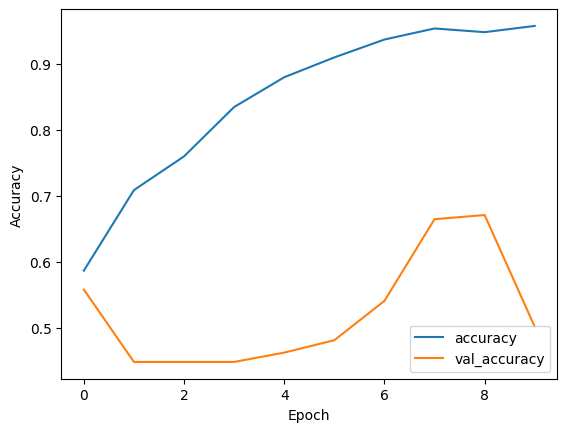

20/20 - 0s - loss: 0.9429 - accuracy: 0.6708 - 197ms/epoch - 10ms/step

______________________________________________
Epoch 1/10
76/76 [==============================] - 4s 14ms/step - loss: 0.7229 - accuracy: 0.5296 - val_loss: 0.6929 - val_accuracy: 0.5345
Epoch 2/10
76/76 [==============================] - 1s 7ms/step - loss: 0.6489 - accuracy: 0.6439 - val_loss: 0.6917 - val_accuracy: 0.5345
Epoch 3/10
76/76 [==============================] - 0s 6ms/step - loss: 0.5959 - accuracy: 0.7217 - val_loss: 0.6908 - val_accuracy: 0.5345
Epoch 4/10
76/76 [==============================] - 1s 7ms/step - loss: 0.5076 - accuracy: 0.8050 - val_loss: 0.6911 - val_accuracy: 0.5345
Epoch 5/10
76/76 [==============================] - 1s 7ms/step - loss: 0.4576 - accuracy: 0.8513 - val_loss: 0.6932 - val_accuracy: 0.5345
Epoch 6/10
76/76 [==============================] - 1s 7ms/step - loss: 0.4072 - accuracy: 0.8870 - val_loss: 0.7010 - val_accuracy: 0.5218
Epoch 7/10
76/76 [======================

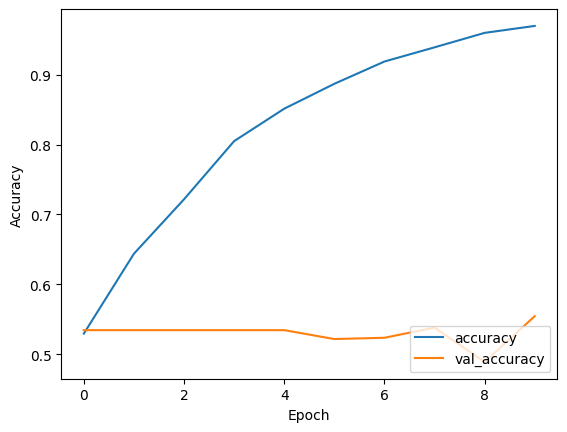

18/18 - 0s - loss: 1.3903 - accuracy: 0.5545 - 201ms/epoch - 11ms/step

______________________________________________
Epoch 1/10
73/73 [==============================] - 4s 12ms/step - loss: 0.6815 - accuracy: 0.6117 - val_loss: 0.6919 - val_accuracy: 0.5358
Epoch 2/10
73/73 [==============================] - 0s 6ms/step - loss: 0.4559 - accuracy: 0.7894 - val_loss: 0.7926 - val_accuracy: 0.5358
Epoch 3/10
73/73 [==============================] - 0s 6ms/step - loss: 0.3070 - accuracy: 0.8741 - val_loss: 0.7237 - val_accuracy: 0.5103
Epoch 4/10
73/73 [==============================] - 0s 6ms/step - loss: 0.2040 - accuracy: 0.9234 - val_loss: 0.9597 - val_accuracy: 0.5358
Epoch 5/10
73/73 [==============================] - 1s 8ms/step - loss: 0.1479 - accuracy: 0.9495 - val_loss: 0.7213 - val_accuracy: 0.5564
Epoch 6/10
73/73 [==============================] - 1s 10ms/step - loss: 0.0834 - accuracy: 0.9782 - val_loss: 0.6849 - val_accuracy: 0.6932
Epoch 7/10
73/73 [=====================

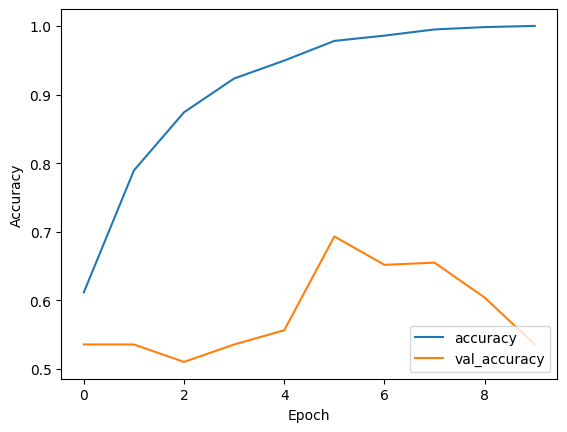

20/20 - 0s - loss: 0.6849 - accuracy: 0.6932 - 280ms/epoch - 14ms/step

______________________________________________
Epoch 1/10
74/74 [==============================] - 4s 22ms/step - loss: 0.6093 - accuracy: 0.6919 - val_loss: 0.7135 - val_accuracy: 0.4224
Epoch 2/10
74/74 [==============================] - 1s 7ms/step - loss: 0.3479 - accuracy: 0.8573 - val_loss: 0.9219 - val_accuracy: 0.4224
Epoch 3/10
74/74 [==============================] - 1s 7ms/step - loss: 0.2307 - accuracy: 0.9081 - val_loss: 1.0942 - val_accuracy: 0.4224
Epoch 4/10
74/74 [==============================] - 1s 7ms/step - loss: 0.1368 - accuracy: 0.9496 - val_loss: 1.3551 - val_accuracy: 0.4224
Epoch 5/10
74/74 [==============================] - 1s 7ms/step - loss: 0.0788 - accuracy: 0.9769 - val_loss: 2.9882 - val_accuracy: 0.4224
Epoch 6/10
74/74 [==============================] - 1s 8ms/step - loss: 0.0421 - accuracy: 0.9902 - val_loss: 1.4304 - val_accuracy: 0.4576
Epoch 7/10
74/74 [======================

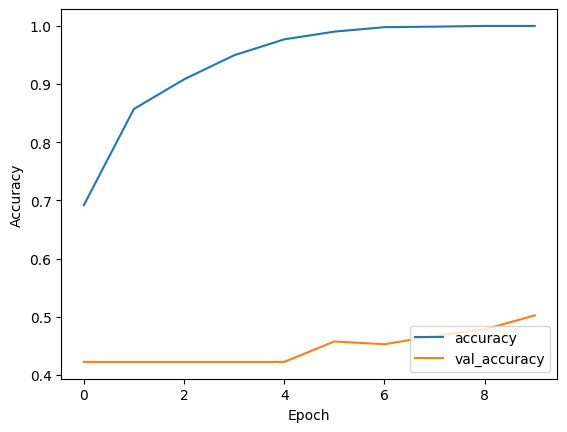

20/20 - 0s - loss: 2.5913 - accuracy: 0.5024 - 229ms/epoch - 11ms/step

______________________________________________
Epoch 1/10
77/77 [==============================] - 3s 14ms/step - loss: 0.6594 - accuracy: 0.6429 - val_loss: 0.7215 - val_accuracy: 0.4895
Epoch 2/10
77/77 [==============================] - 1s 7ms/step - loss: 0.4387 - accuracy: 0.7973 - val_loss: 1.2489 - val_accuracy: 0.4895
Epoch 3/10
77/77 [==============================] - 1s 7ms/step - loss: 0.2981 - accuracy: 0.8808 - val_loss: 2.2521 - val_accuracy: 0.4895
Epoch 4/10
77/77 [==============================] - 1s 8ms/step - loss: 0.2279 - accuracy: 0.9038 - val_loss: 2.1590 - val_accuracy: 0.4895
Epoch 5/10
77/77 [==============================] - 1s 9ms/step - loss: 0.1398 - accuracy: 0.9484 - val_loss: 2.3220 - val_accuracy: 0.4876
Epoch 6/10
77/77 [==============================] - 1s 7ms/step - loss: 0.1003 - accuracy: 0.9656 - val_loss: 2.2176 - val_accuracy: 0.4608
Epoch 7/10
77/77 [======================

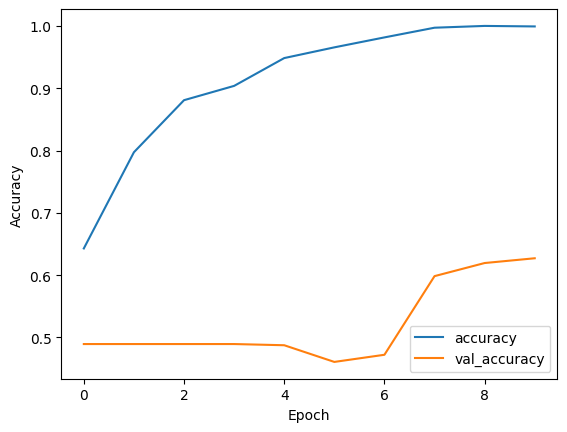

17/17 - 0s - loss: 2.3536 - accuracy: 0.6272 - 206ms/epoch - 12ms/step

______________________________________________


In [ ]:
# Definir splits 5-fold crossvalidation

skf = StratifiedKFold(n_splits=5)

all_preds = []
all_test = []
acc_test = []

for i, (train_index, test_index) in enumerate(skf.split(files, labels)):

  # Extraer imagenes y etiquetas
  tr_images, tr_labels = get_images(files[train_index], labels[train_index])
  ts_images, ts_labels = get_images(files[test_index], labels[test_index])

  # Callback
  filepath = './my_best_model.hdf5'
  checkpoint = ModelCheckpoint(filepath=filepath,
                                monitor='val_accuracy',
                                verbose=0,
                                save_best_only=True,
                                mode='max')
  callbacks = [checkpoint]

  # Entrenar Modelo
  optimizer = Adam(0.001)

  model_cloned = clone_model(model)
  model_cloned.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

  history = model_cloned.fit(tr_images, tr_labels, epochs=10,
                              validation_data=(ts_images, ts_labels),
                              callbacks=callbacks)

  model_cloned = load_model(filepath)
  all_preds.append(model_cloned.predict(ts_images))
  all_test.append(ts_labels)


  # Graficar historia de entrenamiento
  plt.figure()
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  test_loss, test_acc = model_cloned.evaluate(ts_images,  ts_labels, verbose=2)
  acc_test.append(test_acc)
  print('\n______________________________________________')


In [ ]:
# Accuracy promedio
val = np.mean(acc_test)
val2 = np.std(acc_test)
print(f'El Accuracy de prueba promedio entre los 5 folds es de {val:.3} ± {val2:.3} ')

El Accuracy de prueba promedio entre los 5 folds es de 0.61 ± 0.0715 


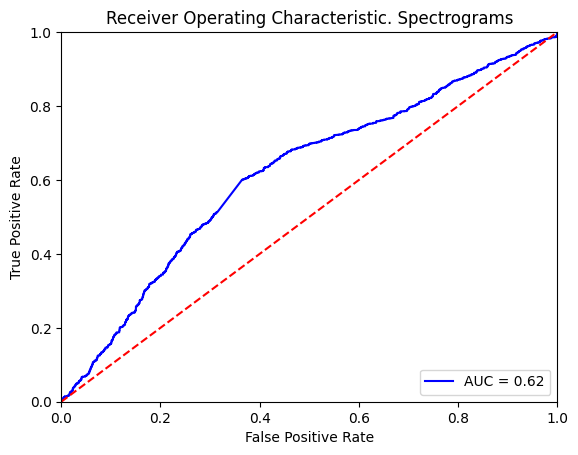

In [ ]:
import sklearn.metrics as metrics

# Graficar Curva ROC
all_preds1 = np.vstack(all_preds)
all_test1 = np.hstack(all_test)

fpr, tpr, threshold = metrics.roc_curve(all_test1, all_preds1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic. Spectrograms')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Modelo con atractores

In [ ]:
# Definir modelo

model1 = models.Sequential()
# Convolutional Layers
model1.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(182, 182, 1)))
model1.add(layers.MaxPooling2D((3, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(16, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
#Fully connected layers
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 60, 60, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 58, 58, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                      

In [ ]:
#Paths
ruta =  "/content/Proyecto_Deep_Learning_Diego_Lopez/local/attractors"

# Get list of filenames
labels = []
files = [f for f in listdir(ruta) if (isfile(join(ruta, f)))]
random.shuffle(files)
for i in range(len(files)):
    files[i] = ruta + "/" + files[i]
    labels.append(0 if 'HC' in files[i] else 1)

labels = np.array(labels)
files = np.array(files)


Epoch 1/10
74/74 [==============================] - 4s 22ms/step - loss: 0.8961 - accuracy: 0.6094 - val_loss: 0.6918 - val_accuracy: 0.5056
Epoch 2/10
74/74 [==============================] - 1s 12ms/step - loss: 0.5060 - accuracy: 0.7419 - val_loss: 0.6827 - val_accuracy: 0.5520
Epoch 3/10
74/74 [==============================] - 1s 13ms/step - loss: 0.3952 - accuracy: 0.8338 - val_loss: 0.7049 - val_accuracy: 0.5616
Epoch 4/10
74/74 [==============================] - 1s 14ms/step - loss: 0.2888 - accuracy: 0.8833 - val_loss: 0.7393 - val_accuracy: 0.5664
Epoch 5/10
74/74 [==============================] - 1s 14ms/step - loss: 0.1675 - accuracy: 0.9598 - val_loss: 0.7744 - val_accuracy: 0.4832
Epoch 6/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0901 - accuracy: 0.9876 - val_loss: 0.9741 - val_accuracy: 0.5568
Epoch 7/10
74/74 [==============================] - 1s 13ms/step - loss: 0.0426 - accuracy: 0.9957 - val_loss: 1.0711 - val_accuracy: 0.5280
Epoch 8/10
74

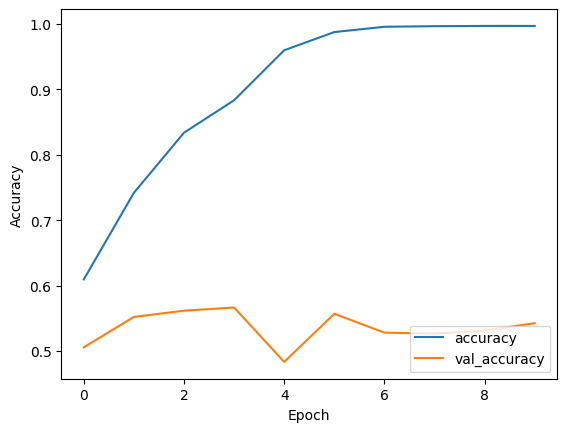

20/20 - 0s - loss: 0.7393 - accuracy: 0.5664 - 240ms/epoch - 12ms/step

______________________________________________
Epoch 1/10
72/72 [==============================] - 5s 33ms/step - loss: 0.9262 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 2/10
72/72 [==============================] - 1s 14ms/step - loss: 0.6933 - accuracy: 0.5087 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 3/10
72/72 [==============================] - 1s 12ms/step - loss: 0.6931 - accuracy: 0.5083 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 4/10
72/72 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5083 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 5/10
72/72 [==============================] - 1s 12ms/step - loss: 0.6931 - accuracy: 0.5083 - val_loss: 0.6932 - val_accuracy: 0.5023
Epoch 6/10
72/72 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5083 - val_loss: 0.6932 - val_accuracy: 0.5023
Epoch 7/10
72/72 [=================

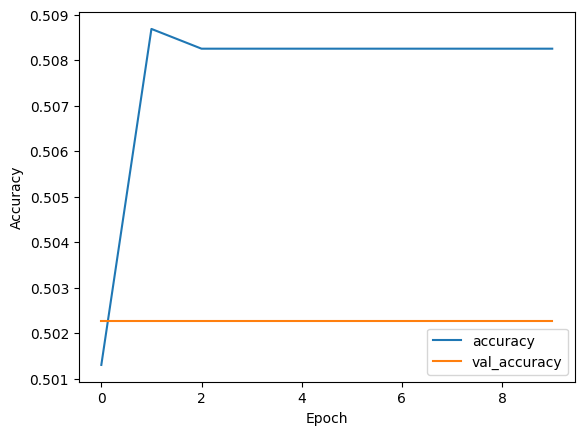

21/21 - 0s - loss: 0.6931 - accuracy: 0.5023 - 253ms/epoch - 12ms/step

______________________________________________
Epoch 1/10
76/76 [==============================] - 4s 24ms/step - loss: 0.6972 - accuracy: 0.6437 - val_loss: 0.6971 - val_accuracy: 0.4944
Epoch 2/10
76/76 [==============================] - 1s 15ms/step - loss: 0.4198 - accuracy: 0.7992 - val_loss: 0.7004 - val_accuracy: 0.4481
Epoch 3/10
76/76 [==============================] - 1s 13ms/step - loss: 0.2856 - accuracy: 0.8866 - val_loss: 0.7425 - val_accuracy: 0.4944
Epoch 4/10
76/76 [==============================] - 1s 12ms/step - loss: 0.1281 - accuracy: 0.9674 - val_loss: 0.9474 - val_accuracy: 0.4944
Epoch 5/10
76/76 [==============================] - 1s 14ms/step - loss: 0.0498 - accuracy: 0.9938 - val_loss: 0.9730 - val_accuracy: 0.5130
Epoch 6/10
76/76 [==============================] - 1s 13ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 1.1081 - val_accuracy: 0.5148
Epoch 7/10
76/76 [=================

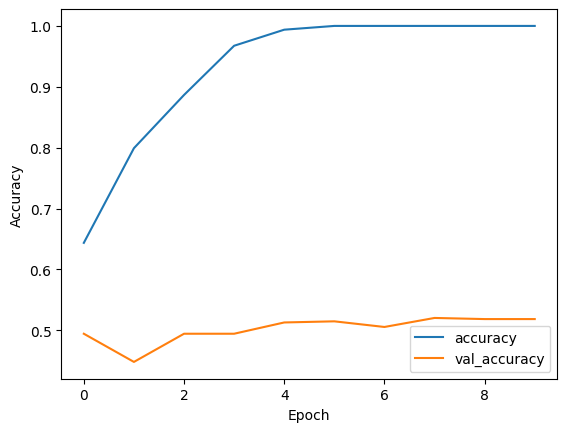

17/17 - 0s - loss: 1.8586 - accuracy: 0.5204 - 241ms/epoch - 14ms/step

______________________________________________
Epoch 1/10
75/75 [==============================] - 4s 26ms/step - loss: 0.6677 - accuracy: 0.6634 - val_loss: 0.6933 - val_accuracy: 0.5573
Epoch 2/10
75/75 [==============================] - 1s 15ms/step - loss: 0.3732 - accuracy: 0.8382 - val_loss: 0.7260 - val_accuracy: 0.5368
Epoch 3/10
75/75 [==============================] - 1s 12ms/step - loss: 0.2078 - accuracy: 0.9265 - val_loss: 0.7626 - val_accuracy: 0.5470
Epoch 4/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0877 - accuracy: 0.9790 - val_loss: 0.7912 - val_accuracy: 0.5624
Epoch 5/10
75/75 [==============================] - 1s 14ms/step - loss: 0.0378 - accuracy: 0.9966 - val_loss: 0.8673 - val_accuracy: 0.5778
Epoch 6/10
75/75 [==============================] - 1s 13ms/step - loss: 0.0193 - accuracy: 0.9996 - val_loss: 0.9409 - val_accuracy: 0.5538
Epoch 7/10
75/75 [=================

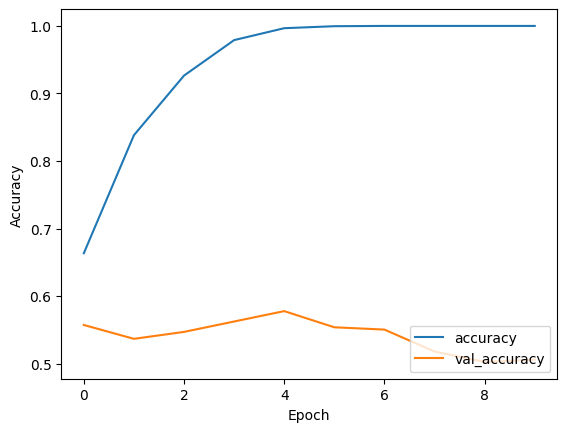

19/19 - 0s - loss: 0.8673 - accuracy: 0.5778 - 222ms/epoch - 12ms/step

______________________________________________
Epoch 1/10
76/76 [==============================] - 4s 20ms/step - loss: 0.9606 - accuracy: 0.5972 - val_loss: 0.6848 - val_accuracy: 0.5670
Epoch 2/10
76/76 [==============================] - 1s 14ms/step - loss: 0.4915 - accuracy: 0.7692 - val_loss: 0.6943 - val_accuracy: 0.5707
Epoch 3/10
76/76 [==============================] - 1s 12ms/step - loss: 0.3729 - accuracy: 0.8417 - val_loss: 0.6829 - val_accuracy: 0.5435
Epoch 4/10
76/76 [==============================] - 1s 12ms/step - loss: 0.2690 - accuracy: 0.9005 - val_loss: 0.7305 - val_accuracy: 0.5054
Epoch 5/10
76/76 [==============================] - 1s 12ms/step - loss: 0.1973 - accuracy: 0.9320 - val_loss: 0.8115 - val_accuracy: 0.5344
Epoch 6/10
76/76 [==============================] - 1s 12ms/step - loss: 0.1117 - accuracy: 0.9702 - val_loss: 0.8789 - val_accuracy: 0.5109
Epoch 7/10
76/76 [=================

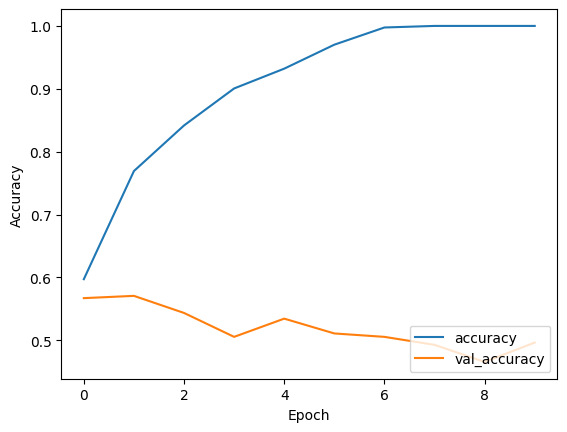

18/18 - 0s - loss: 0.6943 - accuracy: 0.5707 - 230ms/epoch - 13ms/step

______________________________________________


In [ ]:
# Definir splits 5-fold crossvalidation

skf = StratifiedKFold(n_splits=5)

all_preds = []
all_test = []
acc_test = []

for i, (train_index, test_index) in enumerate(skf.split(files, labels)):

  # Extraer imagenes y etiquetas
  tr_images, tr_labels = get_images(files[train_index], labels[train_index])
  ts_images, ts_labels = get_images(files[test_index], labels[test_index])

  # Callback
  filepath = './my_best_model.hdf5'
  checkpoint = ModelCheckpoint(filepath=filepath,
                                monitor='val_accuracy',
                                verbose=0,
                                save_best_only=True,
                                mode='max')
  callbacks = [checkpoint]

  # Entrenar Modelo
  optimizer = Adam(0.001)

  model_cloned = clone_model(model1)
  model_cloned.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

  history = model_cloned.fit(tr_images, tr_labels, epochs=10,
                              validation_data=(ts_images, ts_labels),
                              callbacks=callbacks)

  model_cloned = load_model(filepath)
  all_preds.append(model_cloned.predict(ts_images))
  all_test.append(ts_labels)


  # Graficar historia de entrenamiento
  plt.figure()
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  test_loss, test_acc = model_cloned.evaluate(ts_images,  ts_labels, verbose=2)
  acc_test.append(test_acc)
  print('\n______________________________________________')


In [ ]:
# Accuracy promedio
val = np.mean(acc_test)
val2 = np.std(acc_test)
print(f'El Accuracy de prueba promedio entre los 5 folds es de {val:.3} ± {val2:.3} ')

El Accuracy de prueba promedio entre los 5 folds es de 0.547 ± 0.0303 


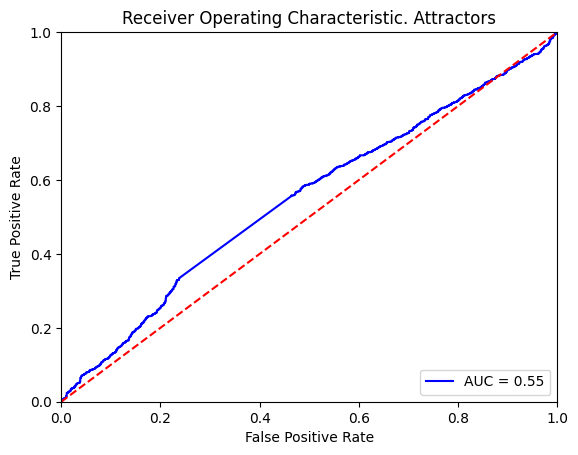

In [ ]:
#all_preds1 = np.round(np.vstack(all_preds))
all_preds1 = np.vstack(all_preds)
all_test1 = np.hstack(all_test)

fpr, tpr, threshold = metrics.roc_curve(all_test1, all_preds1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic. Attractors')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()